### Задача:
#### $ \left\{\begin{matrix}  \frac{dy1}{dx} = 99y1+250y2 
\\  \frac{dy2}{dx} = 40y1+99y2 
\\ y1(0) = A
\\ y2(0) = B
\\ 0<x<D=1
\end{matrix}\right. $
#### $ Y(x) = \binom{y1(x)}{{y2(x)}} \Rightarrow  {Y}' =\binom{{y1}'(x)}{{{y2}'(x)}}=F(x,Y) = \binom{99Y[0] + 250Y[1]}{{40Y[0] + 99Y[1]}} $


### Решение задачи будет осуществляться с помощью неявного метода Эйлера первого порядка:

#### $ y_{n+1}=y_{n}+hf_{1}, $
#### $f_{1} = f(x_{n}+h, y_{n}+hf_{1}), $  
#### $n=0,...,N-1$  

### Проверка порядка аппроксимации:
####  Условие Кутты: $ c_{j} = \sum_{i=1}^{s}{a_{ij}} ,\forall j  $
#### $ p = 1: \sum_{i=1}^{s}{b_{i}} =  b_{1} = 1 $
#### $ p = 2: 2 \sum_{i=1}^{s}{b_{i}}{c_{i}} = 2\cdot 1\cdot 1 = 2\neq 1 \Rightarrow $ метод 1 порядка.

### Устойчивость:
#### Функция устойчивости: $ R(z) = \frac{1}{1-z}, z = \lambda h $
#### Область устойчивости: $\left | R(z) \right | \leq 1, \forall \lambda_{i} $
#### $ \lambda_{1}=199,  \lambda_{2}=-1 \Rightarrow$ метод будет устойчив при h:
#### $\left\{\begin{matrix}  | \frac{1}{1-199 h} | \leq 1
\\  | \frac{1}{1+h} | \leq 1
\end{matrix}\right. \rightarrow h \geq \frac{2}{199}$


### Аналитическое решение:
#### $ y_{1} = \frac{5}{2}(\frac{A}{5} - \frac{B}{2})e^{-x} + \frac{5}{2}(\frac{A}{5} + \frac{B}{2})e^{199x}$
#### $y_{2} = -(\frac{A}{5} - \frac{B}{2})e^{-x} + (\frac{A}{5} + \frac{B}{2})e^{199x}$

In [610]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps
from numpy import linalg

arr = np.array([[99, 250], [40, 99]])

def ode_sofa(A, B, D, arr, h):  
    x = np.arange(0, D + h, h)
    N = x.shape[0]
    Y = np.zeros((N, 2))
    Y[0][0] = A  # начальные 
    Y[0][1] = B  # условия
    
    k = np.zeros(2)    
    for n in range(N-1): 
        # решаем уравнение Tk = b 
        b = np.dot(arr, Y[n])
        T = np.eye(2) - arr * h
        k = linalg.solve(T,b)
        Y[n+1] = Y[n] + h * k
    return Y

def table(h, A, B, D):
    x = np.arange(0, D + h, h)
    array = np.zeros((7, 11))
    m = (np.arange(0, D + h, h).shape[0]-1)/10
    for i in range(11):
        array[0][i] = x[int(m*i)]
        array[1][i] = ode_sofa(A, B, D, arr, h)[int(m*i)][0]
        array[2][i] = (A / 5 - B / 2) * np.exp(-x[int(m*i)]) * 5 / 2 + (A / 5 + B / 2) * np.exp(199 * x[int(m*i)]) * 5 / 2
        array[3][i] = np.fabs(array[2][i] - array[1][i])
        array[4][i] = ode_sofa(A, B, D, arr, h)[int(m*i)][1]
        array[5][i] = - (A / 5 - B / 2) * np.exp(-x[int(m*i)]) + (A / 5 + B / 2) * np.exp(199 * x[int(m*i)])
        array[6][i] = np.fabs(array[5][i] - array[4][i])
        rows = ['x', '(y1)', '[y1]', '|dy1|', '(y2)', '[y2]', '|dy2|']
    return array

def view(a, b=None, c=None):
    return ps.DataFrame(a, b, c)

Вывод результатов

In [635]:
# параметры
A = -50
B = 20
D = 3
h = 2/199 * 1

In [623]:
view(table(h, A, B, D), ['x', '(y1)', '[y1]', '|dy1|', '(y2)', '[y2]', '|dy2|'])

,0,1,2,3,4,5,6,7,8,9,10
x,0.0,0.291457,0.592965,0.894472,1.195980,1.497487,1.798995,2.100503,2.402010,2.703518,3.005025
(y1),-50.0,-37.413088,-27.716228,-20.532635,-15.210912,-11.268493,-8.347884,-6.184249,-4.581393,-3.393971,-2.514309
[y1],-50.0,-37.358696,-27.634312,-20.441163,-15.120374,-11.184575,-8.273255,-6.119745,-4.526789,-3.348476,-2.476875
|dy1|,0.0,0.054392,0.081916,0.091473,0.090538,0.083918,0.074629,0.064504,0.054604,0.045495,0.037434
(y2),20.0,14.965235,11.086491,8.213054,6.084365,4.507397,3.339154,2.473700,1.832557,1.357588,1.005724
[y2],20.0,14.943479,11.053725,8.176465,6.048150,4.473830,3.309302,2.447898,1.810716,1.339391,0.990750
|dy2|,0.0,0.021757,0.032766,0.036589,0.036215,0.033567,0.029852,0.025801,0.021841,0.018198,0.014973


In [636]:
def table2(n):
    array = np.zeros((2,n)) # для вывода нормы и шага, n - кол-во возможных шагов
    array1 = [] # вспомогательная
    h = 2/199
    for i in range(n):
        array[0][i] = h
        array1.append(max([max(table(h, A, B, D)[3][:]), max(table(h, A, B, D)[6][:])]))
        h = h * 2
    array[1] = array1
    return view(array,  ['h', '||y||'], ['x 1', 'x 2', 'x 4', 'x 8', 'x 16', 'x 32', 'x 64'])
table2(7)

,x 1,x 2,x 4,x 8,x 16,x 32,x 64
h,0.010050,0.020101,0.040201,0.080402,0.160804,0.321608,0.643216
||y||,0.091473,0.182354,0.360623,0.708897,1.383447,2.607666,4.704694


График численного решения:

(0.0, 3.0, 0.0, 10.0)

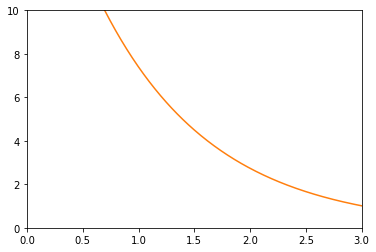

In [637]:
x = np.arange(0, D+h, h)
array = ode_sofa(A, B, D, arr, h)
plt.plot(x, array.T[0])
plt.plot(x, array.T[1])
plt.axis([0,D,0,10])

(0.0, 3.0, 0.0, 10.0)

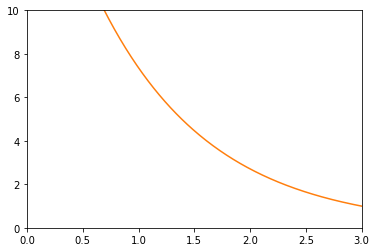

In [638]:
x = np.arange(0, D + h, h)
y1 = (A / 5 - B / 2) * np.exp(-x) * 5 / 2 + (A / 5 + B / 2) * np.exp(199*x) * 5 / 2
y2 = - (A / 5 - B / 2) * np.exp(-x) + (A / 5 + B / 2) * np.exp(199*x) 
plt.plot(x, y1)
plt.plot(x, y2)
plt.axis([0,D,0,10])

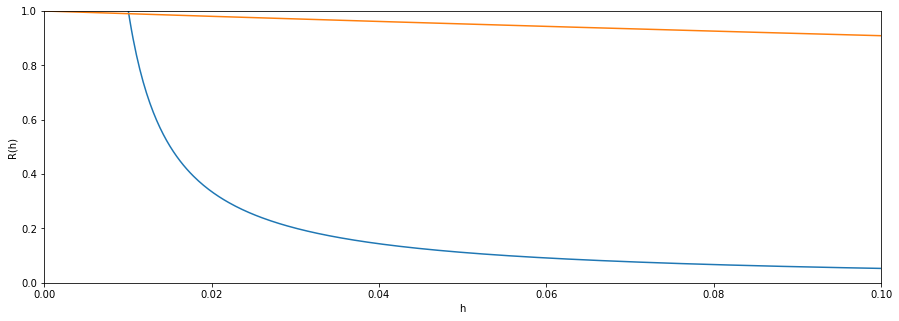

In [469]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps
from numpy import linalg
x = np.linspace(0, 0.1, 500)
R1 = np.fabs(1/(1-199*x))
R2 = np.fabs(1/(1+x))
plt.figure(figsize=(15, 5))
plt.plot(x, R1)
plt.plot(x, R2)
plt.axis([0,0.1,0,1])
plt.xlabel('h')
plt.ylabel('R(h)')
plt.show()